## Question 2: Implementing a Human Posture Detection app (25 points)
The purpose of this question is to use the accelerometer sensor of your smartphone to find out some simple human posture

(a) Use the Physics Toolbox in your smartphone Now take the smartphone in your trouser pocket at any particular orientation Record the accelerometer samples while you are sitting, standing and lying down straight, and plot them Can you see any patterns while performing these actions?

(b) Can you use this pattern for “finding out among these three human postures” in real time? Please use the PhonePI+ app for streaming your data to your computer. Please the setps in GitHub - priyankark/PhonePi_SampleServer: Companion servers in Node and Python for the PhonePi Sensor Streamer apps., and the attached code. Also please use Ubuntu/Linux environment to PhonePi+. Plaese, report your data (in graphs) and outcome in the report.

In [12]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
def read_accelerometer_data(data):
    time = data['time'].tolist()
    accel_x = data['gFx'].tolist()
    accel_y = data['gFy'].tolist()
    accel_z = data['gFz'].tolist()

    return time, accel_x, accel_y, accel_z

def plot_accelerometer(time, accel_x, accel_y, accel_z, title="Accelerometer Data"):
    plt.figure(figsize=(10, 6))
    plt.plot(time, accel_x, label="X-axis Acceleration", color="red")
    plt.plot(time, accel_y, label="Y-axis Acceleration", color="green")
    plt.plot(time, accel_z, label="Z-axis Acceleration", color="blue")
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Acceleration (m/s²)', fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(loc="upper right", fontsize=10)
    plt.show()

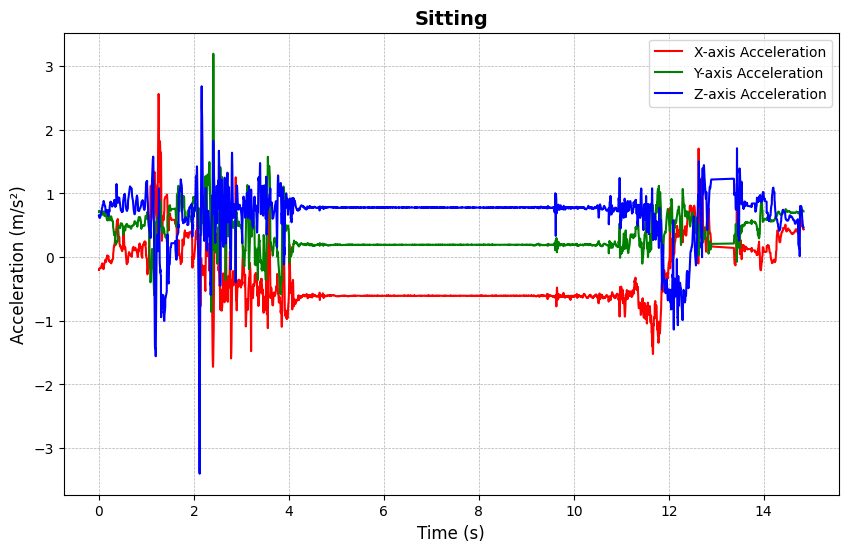

In [14]:
csv_file_data = pd.read_csv('Data Files/Sitting.csv')
time, accel_x, accel_y, accel_z = read_accelerometer_data(csv_file_data)
plot_accelerometer(time, accel_x, accel_y, accel_z, title="Sitting")

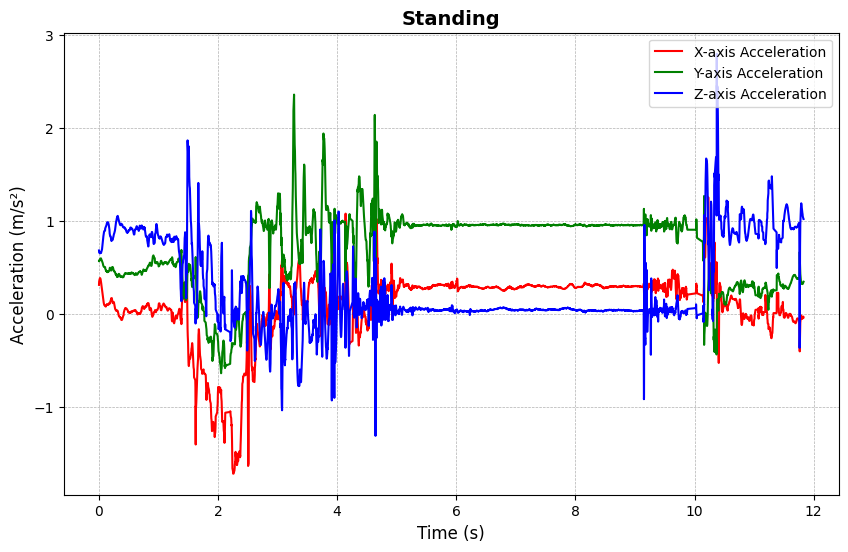

In [15]:
csv_file_data = pd.read_csv('Data Files/Standing.csv')
time, accel_x, accel_y, accel_z = read_accelerometer_data(csv_file_data)
plot_accelerometer(time, accel_x, accel_y, accel_z, title="Standing")

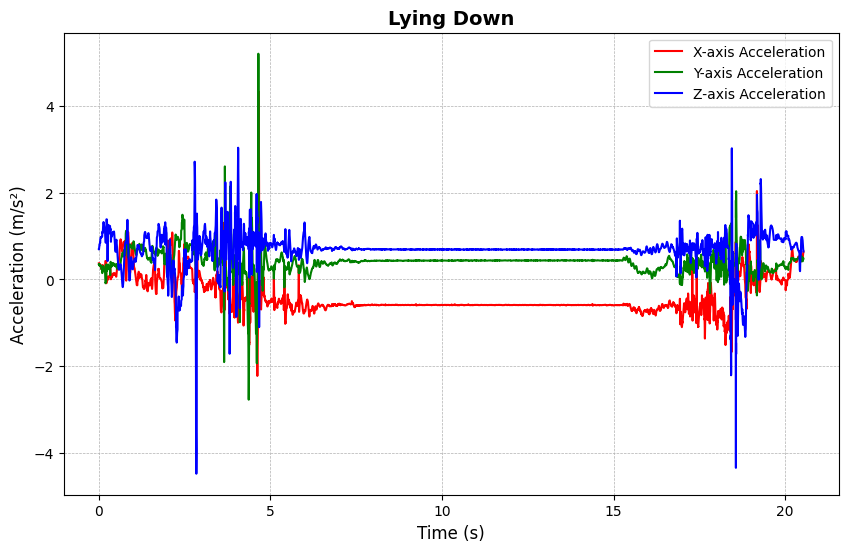

In [16]:
csv_file_data = pd.read_csv('Data Files/LyingDown.csv')
time, accel_x, accel_y, accel_z = read_accelerometer_data(csv_file_data)
plot_accelerometer(time, accel_x, accel_y, accel_z, title="Lying Down")

In [17]:
def classify_posture(row):
    if (row['z'] <= 0):
        return 'Lying Down'
    elif 0.7 <= row['z'] <= 0.8:
        return 'Sitting'
    elif 0.080 < row['z'] < 0.2:
        return 'Standing'
    else:
        return 'Unknown Posture'

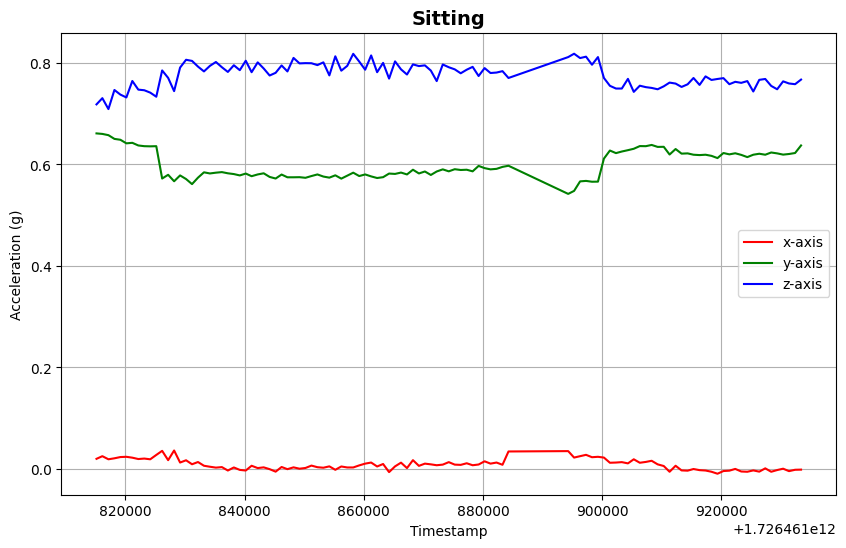

In [18]:
data = []
with open('Data Files/Sitting.txt', 'r') as file:
    for line in file:
        data.append(json.loads(line))

df = pd.DataFrame(data)
df['x'] = df['x'].astype(float)
df['y'] = df['y'].astype(float)
df['z'] = df['z'].astype(float)
df['posture'] = df.apply(classify_posture,  axis=1)

plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['x'], label='x-axis', color='r')
plt.plot(df['Timestamp'], df['y'], label='y-axis', color='g')
plt.plot(df['Timestamp'], df['z'], label='z-axis', color='b')
plt.title('Sitting', fontsize=14, fontweight='bold')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration (g)')
plt.legend()
plt.grid(True)
plt.show()

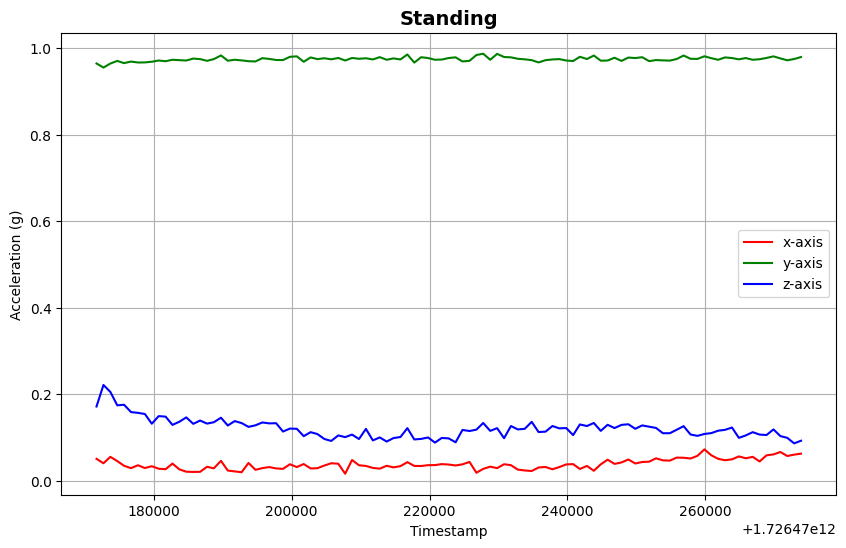

In [19]:
data = []
with open('Data Files/Standing.txt', 'r') as file:
    for line in file:
        data.append(json.loads(line))

df = pd.DataFrame(data)
df['x'] = df['x'].astype(float)
df['y'] = df['y'].astype(float)
df['z'] = df['z'].astype(float)
df['posture'] = df.apply(classify_posture, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['x'], label='x-axis', color='r')
plt.plot(df['Timestamp'], df['y'], label='y-axis', color='g')
plt.plot(df['Timestamp'], df['z'], label='z-axis', color='b')
plt.title('Standing', fontsize=14, fontweight='bold')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration (g)')
plt.legend()
plt.grid(True)
plt.show()

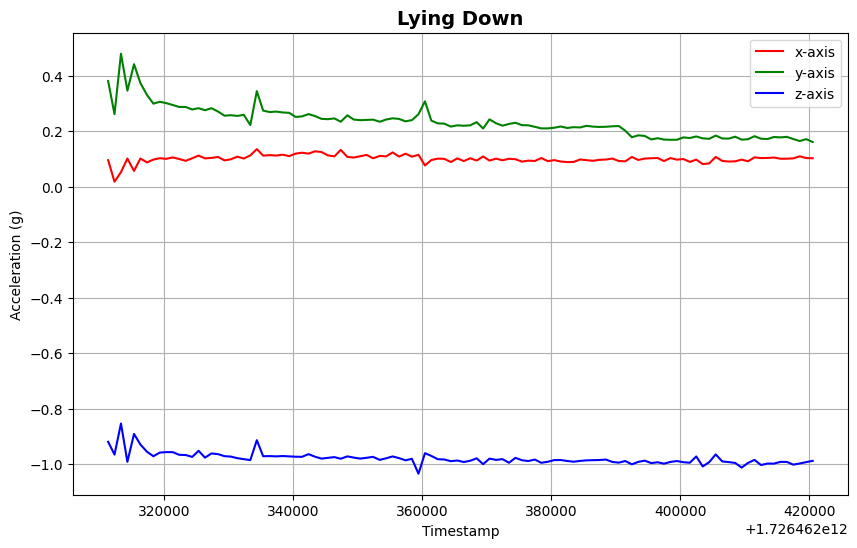

In [20]:
data = []
with open('Data Files/Lying.txt', 'r') as file:
    for line in file:
        data.append(json.loads(line))

df = pd.DataFrame(data)
df['x'] = df['x'].astype(float)
df['y'] = df['y'].astype(float)
df['z'] = df['z'].astype(float)
df['posture'] = df.apply(classify_posture, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['x'], label='x-axis', color='r')
plt.plot(df['Timestamp'], df['y'], label='y-axis', color='g')
plt.plot(df['Timestamp'], df['z'], label='z-axis', color='b')
plt.title('Lying Down', fontsize=14, fontweight='bold')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration (g)')
plt.legend()
plt.grid(True)
plt.show()

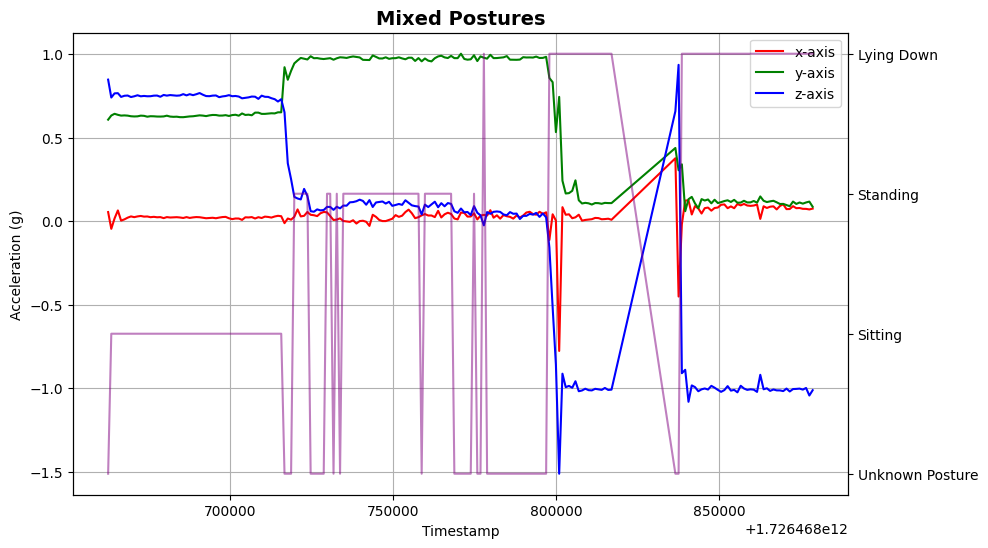

In [21]:
data = []
with open('Data Files/MixedPostures.txt', 'r') as file:
    for line in file:
        data.append(json.loads(line))

df = pd.DataFrame(data)
df['x'] = df['x'].astype(float)
df['y'] = df['y'].astype(float)
df['z'] = df['z'].astype(float)
df['posture'] = df.apply(classify_posture, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['x'], label='x-axis', color='r')
plt.plot(df['Timestamp'], df['y'], label='y-axis', color='g')
plt.plot(df['Timestamp'], df['z'], label='z-axis', color='b')
plt.title('Mixed Postures', fontsize=14, fontweight='bold')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration (g)')
plt.legend()
plt.grid(True)

# Creating another axis to show the (change)or(reading error) in posture
ax2 = plt.gca().twinx()
ax2.plot(df['Timestamp'], df['posture'], label='Posture', color='purple', alpha=0.5)
# ax2.set_yticks([])  # Remove y-axis ticks for posture
plt.show()

## Part (a): Physics Toolbox App
1. The .csv files generated for sitting, standing, and lying down postures provide valuable insights into the variations in acceleration along the x, y, and z axes.
2. Each posture exhibits unique patterns in the acceleration data. For example, the z-axis values are consistently negative when lying down, indicating the phone's upside-down orientation.
3. By analyzing the acceleration data, you can identify specific characteristics that differentiate the three postures. For instance, the z-axis values might be more stable when standing compared to sitting or lying down.

## Part (b): PhonePi App
The PhonePi app effectively collects sensor data and transmits it to the Flask server, enabling efficient data collection and analysis.
1. Posture Classification: The classification algorithm based on z-axis values accurately differentiates between the three postures.
2. Testing and Validation: The testing file (MixedPostures.txt) provides a realistic scenario for evaluating the classifier's performance. The purple line in the graph visually represents the classification results, allowing for easy assessment of accuracy.
3. Challenges and Considerations: The fluctuations observed during posture transitions highlight the potential challenges in real-world applications. Factors like phone movement, user habits, and environmental conditions can influence the accuracy of posture classification.

## Overall Observations
1. The z-axis acceleration provides a reliable indicator for posture classification, especially when distinguishing between lying down and other postures.
2. Incorporating x and y axis data can potentially improve classification accuracy, especially for subtle posture variations or when the phone is not held in a perfectly upright position.
3. The experiment demonstrates the feasibility of using smartphone sensors for posture classification. However, further testing and refinement are needed to address real-world challenges and ensure robust performance in various environments.
4. Exploring machine learning algorithms and feature engineering techniques could enhance classification accuracy and handle more complex posture variations.